In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

%matplotlib inline

In [2]:
mem_zipcodes = gpd.read_file('../data/memphis.geojson')
print(mem_zipcodes.crs)
mem_zipcodes.head( )

epsg:4326


,name,shape_area,geometry
0,38018,10.068270194,"MULTIPOLYGON (((-89.80634 35.15960, -89.80636 ..."
1,38053,0.0334955803514,"MULTIPOLYGON (((-89.97518 35.25242, -89.97413 ..."
2,38103,4.60434606637,"MULTIPOLYGON (((-90.04591 35.18828, -90.04578 ..."
3,38104,4.90297332765,"MULTIPOLYGON (((-90.00875 35.15485, -90.00893 ..."
4,38105,1.62465211531,"MULTIPOLYGON (((-90.01855 35.15551, -90.01902 ..."


<AxesSubplot:>

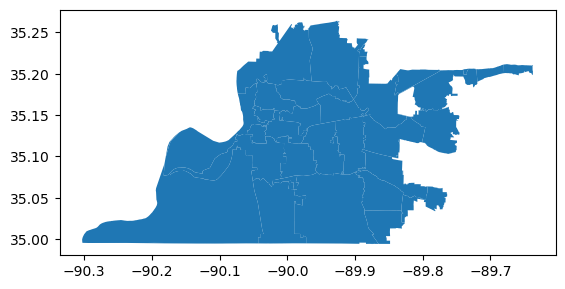

In [3]:
mem_zipcodes.plot()

In [4]:
nas_zipcodes = gpd.read_file('../data/nashville.geojson')
print(nas_zipcodes.crs)
nas_zipcodes.head( )

epsg:4326


,zipcode,poname,created_date,objectid,globalid,created_user,last_edited_date,last_edited_user,geometry
0,37218,NASHVILLE,None,55,{3CB897BE-ACCB-46CB-BA4E-6F5E39D6C451},None,None,None,"MULTIPOLYGON (((-86.88231 36.26248, -86.88270 ..."
1,37080,JOELTON,None,32,{C63ADE44-CC5E-4CCD-BBF0-4B8A64864B42},None,None,None,"MULTIPOLYGON (((-86.90742 36.39053, -86.90725 ..."
2,37027,BRENTWOOD,None,44,{8846D4AC-5F8A-4434-8348-C9A28297FA4E},None,None,None,"MULTIPOLYGON (((-86.67793 35.98782, -86.67941 ..."
3,37086,LA VERGNE,None,5,{1618FE99-089D-4ED0-BAFA-C29A19596F3D},None,None,None,"MULTIPOLYGON (((-86.58870 36.02671, -86.58836 ..."
4,37219,NASHVILLE,None,15,{B531C81C-3919-4059-8444-23F5F0684ECA},None,None,None,"MULTIPOLYGON (((-86.78609 36.17465, -86.78585 ..."


In [5]:
nas_zipcodes = nas_zipcodes.drop(['created_date', 'objectid', 'globalid', 'created_user', 'last_edited_user', 'last_edited_date'], axis=1)
nas_zipcodes

,zipcode,poname,geometry
0,37218,NASHVILLE,"MULTIPOLYGON (((-86.88231 36.26248, -86.88270 ..."
1,37080,JOELTON,"MULTIPOLYGON (((-86.90742 36.39053, -86.90725 ..."
2,37027,BRENTWOOD,"MULTIPOLYGON (((-86.67793 35.98782, -86.67941 ..."
3,37086,LA VERGNE,"MULTIPOLYGON (((-86.58870 36.02671, -86.58836 ..."
4,37219,NASHVILLE,"MULTIPOLYGON (((-86.78609 36.17465, -86.78585 ..."
5,37015,ASHLAND CITY,"MULTIPOLYGON (((-86.88867 36.28013, -86.88867 ..."
6,37143,PEGRAM,"MULTIPOLYGON (((-87.03553 36.08659, -87.03556 ..."
7,37072,GOODLETTSVILLE,"MULTIPOLYGON (((-86.76191 36.39867, -86.76200 ..."
8,37189,WHITES CREEK,"MULTIPOLYGON (((-86.84400 36.32689, -86.83591 ..."
9,37015,ASHLAND CITY,"MULTIPOLYGON (((-86.92773 36.28074, -86.92769 ..."


<AxesSubplot:>

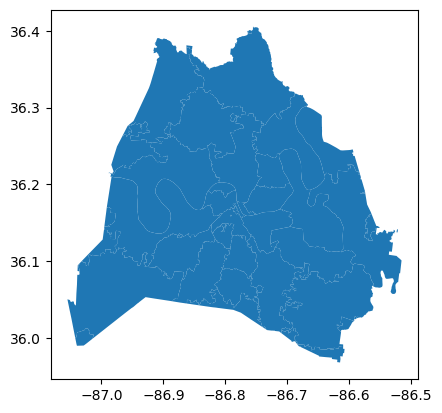

In [6]:
nas_zipcodes.plot()

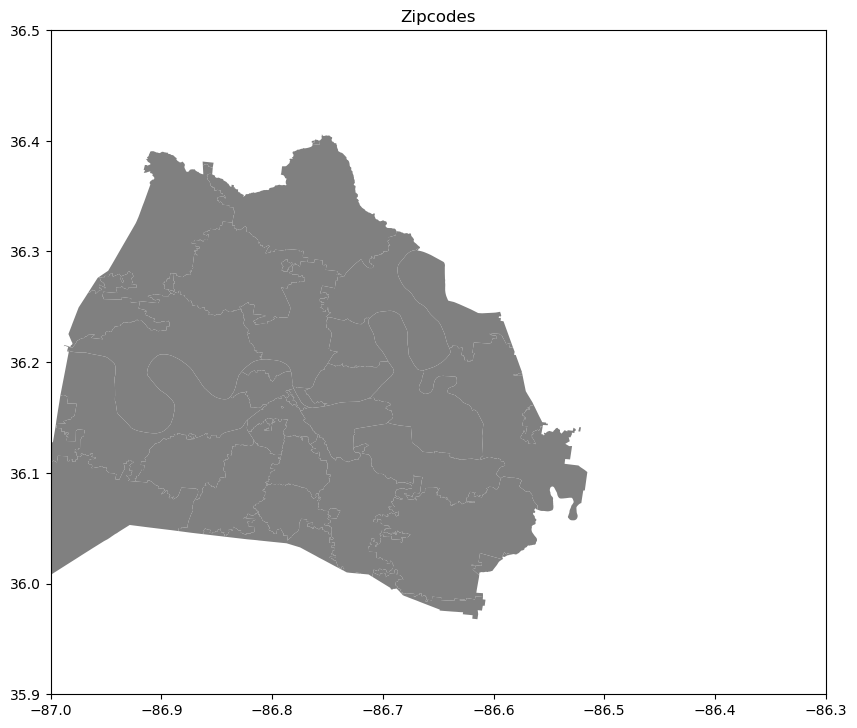

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from descartes import PolygonPatch
from shapely.ops import polygonize

# create a list of zipcodes to highlight
highlight_zipcodes = [37206, 37216, 37208, 37207, 37211, 37204, 37212, 37208, 37208]

# create a boolean array based on whether the zipcode is in the list of zipcodes to highlight
highlight = np.array([zipcode in highlight_zipcodes for zipcode in nas_zipcodes['zipcode']])

# create a color map with the highlight color for the highlighted zip codes and grey for the others
colors = ['grey' if not h else 'blue' if zipcode == 37206 else 'red' if zipcode == 37216 else 'green' if zipcode == 37208 else 'orange' if zipcode == 37207 else 'purple' if zipcode == 37211 else 'pink' if zipcode == 37204 else 'brown' if zipcode == 37212 else 'yellow' for zipcode, h in zip(nas_zipcodes['zipcode'], highlight)]

# create a PatchCollection with the zip code polygons
patches = [PolygonPatch(polygon) for polygon in nas_zipcodes['geometry']]
pc = PatchCollection(patches)

# set the face color of each polygon based on the highlight boolean array and the colors list
pc.set_facecolor(colors)

# plot the map with the specified colors
fig, ax = plt.subplots(figsize=(10, 10))
ax.add_collection(pc)
ax.set_xlim([-87.0, -86.3])
ax.set_ylim([35.9, 36.5])
ax.set_aspect('equal')
ax.set_title('Zipcodes')

plt.show()


In [8]:
import folium

highlight_zipcodes = [37206, 37216, 37208, 37207, 37211, 37204, 37208, 37212, 37208]

# create the Folium map centered on Nashville
nashville = folium.Map(location=[36.16, -86.8], zoom_start=11)

# loop through the highlight zip codes and add a marker for each one
for zipcode in highlight_zipcodes:
    # get the centroid of the zipcode polygon
    centroid = nas_zipcodes[nas_zipcodes['zipcode'] == zipcode].centroid
    if not centroid.empty:
        # if the centroid is not empty, add a marker for the centroid with the zipcode as the popup text
        centroid = centroid.values[0]
        folium.Marker(location=[centroid.y, centroid.x], popup=str(zipcode)).add_to(nashville)

# display the map
nashville




C:\Users\chern\AppData\Local\Temp\ipykernel_27576\3053701258.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = nas_zipcodes[nas_zipcodes['zipcode'] == zipcode].centroid


In [9]:
permits = pd.read_csv('Building_Permits_Issued.csv')

C:\Users\chern\AppData\Local\Temp\ipykernel_27576\4020224780.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  permits = pd.read_csv('Building_Permits_Issued.csv')


In [10]:
permits.head()

,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Construction Cost,Address,City,State,ZIP,Subdivision / Lot,Contact,Permit Type,Permit Subtype,IVR Tracking #,Purpose,Council District,Census Tract,Mapped Location
0,2021021204,Building Residential - New,Single Family Residence,07112039200,04/07/2021,05/05/2021,292188.0,1807 JOY CIR,NASHVILLE,TN,3720.0,LOT 54 JOYWOOD SUB,HARP DEVELOPMENT LLC,CARN,CAA01R301,3963014,to construct a single family residence with 24...,5.0,37011300.0,"1807 JOY CIR\nNASHVILLE, TN 03720\n(36.202582,..."
1,2021041540,Building Residential - New,Single Family Residence,050020A16000CO,06/30/2021,08/05/2021,203683.0,1356 WESTCHESTER DR,NASHVILLE,TN,37207.0,LOT 160 BELLE ARBOR PUD PH 6,"NVR, INC. T/A RYAN HOMES",CARN,CAA01R301,4010172,"NEW SFD ON SLAB FOUNDATION MEASURING 1,680 SF ...",3.0,37010903.0,"1356 WESTCHESTER DR\nNASHVILLE, TN 37207\n(36...."
2,2021061611,Building Residential - New,"Accessory Structure, Pools - Residential",11510005300,09/24/2021,11/05/2021,100000.0,6523B CURRYWOOD DR,NASHVILLE,TN,37205.0,LOT 214 SEC 1 WEST MEADE ESTATES,BUILD NASHVILLE LLC,CARN,CAA14U017,4042074,to construct 30'x15.5' in ground pool to the r...,23.0,37018202.0,"6523B CURRYWOOD DR\nNASHVILLE, TN 37205\n(36.1..."
3,2022051265,Building Residential - New,Single Family Residence,164070B02500CO,08/01/2022,08/09/2022,267455.0,1184 ALCOVE WAY,ANTIOCH,TN,37013.0,LOT 25 PROVIDENCE ARBOURS,PROGRESSIVE DEVELOPMENT LLC,CARN,CAA01R301,4187040,To construct new single family residence with ...,33.0,37015631.0,"1184 ALCOVE WAY\nANTIOCH, TN 37013"
4,2021049582,Building Demolition Permit,Demolition Permit - Residential,11802004700,08/04/2021,08/05/2021,7000.0,812 INVERNESS AVE,NASHVILLE,TN,37204.0,PT OF LOT 24 SUB OF CASWELL ROSE HOME TRACT,PAROS GROUP LLC,CADM,CAZ01A001,4023265,To demolish structure or structures to finishe...,17.0,37017100.0,"812 INVERNESS AVE\nNASHVILLE, TN 37204\n(36.12..."


In [11]:
# Create a list of the redlined ZIP codes
zip_codes = [37206.0, 37216.0, 37208.0, 37207.0, 37211.0, 37204.0, 37212.0, 37208.0, 37208.0]

# Filter the DataFrame to only include rows with the desired ZIP codes
redlined = permits[permits['ZIP'].isin(zip_codes)]

#I also want to drop some columns are that not needed. 
redlined = redlined.drop(['Permit #', 'Parcel', 'Date Entered', ], axis=1)

In [12]:
redlined

,Permit Type Description,Permit Subtype Description,Date Issued,Construction Cost,Address,City,State,ZIP,Subdivision / Lot,Contact,Permit Type,Permit Subtype,IVR Tracking #,Purpose,Council District,Census Tract,Mapped Location
1,Building Residential - New,Single Family Residence,08/05/2021,203683.0,1356 WESTCHESTER DR,NASHVILLE,TN,37207.0,LOT 160 BELLE ARBOR PUD PH 6,"NVR, INC. T/A RYAN HOMES",CARN,CAA01R301,4010172,"NEW SFD ON SLAB FOUNDATION MEASURING 1,680 SF ...",3.0,37010903.0,"1356 WESTCHESTER DR\nNASHVILLE, TN 37207\n(36...."
4,Building Demolition Permit,Demolition Permit - Residential,08/05/2021,7000.0,812 INVERNESS AVE,NASHVILLE,TN,37204.0,PT OF LOT 24 SUB OF CASWELL ROSE HOME TRACT,PAROS GROUP LLC,CADM,CAZ01A001,4023265,To demolish structure or structures to finishe...,17.0,37017100.0,"812 INVERNESS AVE\nNASHVILLE, TN 37204\n(36.12..."
5,Building Residential - New,"Multifamily, Townhome",11/05/2021,137567.0,2935 WINTERBERRY DR 35,NASHVILLE,TN,37207.0,UNIT 31 THORNTON GROVE TOWNHOMES,"NVR, INC. T/A RYAN HOMES",CARN,CAA03R301,4048811,NEW TOWNHOUSE BUILDING ON SLAB FOUNDATION MEAS...,3.0,37010106.0,"2935 WINTERBERRY DR 35\nNASHVILLE, TN 37207"
15,Building Demolition Permit,Demolition Permit - Residential,05/05/2021,5000.0,716 28TH AVE N,NASHVILLE,TN,37208.0,COMMON AREA HOMES AT 716 28TH AVENUE NORTH,MAXIM HOMES LLC,CADM,CAZ01A001,3957444,To demolish existing residential duplex struct...,21.0,37014300.0,"716 28TH AVE N\nNASHVILLE, TN 37208\n(36.15998..."
16,Building Use & Occupancy,"Accessory Structure, Pools - Residential",05/05/2021,4774.0,721B ONEIDA AVE,NASHVILLE,TN,37207.0,LOT 85 VICTORY HGTS SUB,SELF CONTRACTOR RESIDENTIAL (SEE APPLICANT INF...,CAUO,CAA14U017,3975619,To install a new 24' diameter ABOVE-GROUND POO...,5.0,37011300.0,"721B ONEIDA AVE\nNASHVILLE, TN 37207\n(36.1996..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34513,Building Commercial - New,"Multifamily, Tri-Plex, Quad, Apartments",12/03/2021,3945814.0,1500 BELL RD,NASHVILLE,TN,37211.0,S SIDE BELL RD E OF OLD HICKORY BLVD (SPECIAL ...,BACAR CONSTRUCTORS INC,CACN,CAA03R398,4034762,To construct Apartment Building # 2 SWGR # T2...,31.0,37019112.0,"1500 BELL RD\nNASHVILLE, TN 37211\n(36.04303, ..."
34514,Building Residential - New,Single Family Residence,06/23/2022,278973.0,2017 CREEKLAND VIEW BLVD,NASHVILLE,TN,37207.0,LOT 1 HERITAGE CREEK PH 1A,Jeff Hazelip,CARN,CAA01R301,4160319,Single family residence in Heritage Creek comm...,3.0,37010201.0,"2017 CREEKLAND VIEW BLVD\nNASHVILLE, TN 37207"
34518,Building Residential - Addition,"Accessory Structure, Decks",08/02/2021,3000.0,658 HARDING PL,NASHVILLE,TN,37211.0,LOT 478 SEC 6 CALDWELL HALL,"GULY, REDUR & ZEBARI, ARIYAN",CARA,CAA14U015,4015608,TO CONSTRUCT 16�X26� OPEN DECK OVER EXISTING C...,26.0,37018901.0,"658 HARDING PL\nNASHVILLE, TN 37211\n(36.07973..."
34519,Building Sign Permit,Sign - Ground / Wall Signs,10/12/2021,22500.0,3043 NOLENSVILLE PIKE,NASHVILLE,TN,37211.0,"LOTS 3,2&1 PATTERSON MAPLE HILL SUB",ROBINSON ELECTRIC CO INC,CASN,CAZ02A001,4045325,to remove existing cabinets and erect new 137S...,16.0,37017500.0,"3043 NOLENSVILLE PIKE\nNASHVILLE, TN 37211\n(3..."


In [13]:
redlined.columns = [col.lower() for col in redlined.columns]
redlined

,permit type description,permit subtype description,date issued,construction cost,address,city,state,zip,subdivision / lot,contact,permit type,permit subtype,ivr tracking #,purpose,council district,census tract,mapped location
1,Building Residential - New,Single Family Residence,08/05/2021,203683.0,1356 WESTCHESTER DR,NASHVILLE,TN,37207.0,LOT 160 BELLE ARBOR PUD PH 6,"NVR, INC. T/A RYAN HOMES",CARN,CAA01R301,4010172,"NEW SFD ON SLAB FOUNDATION MEASURING 1,680 SF ...",3.0,37010903.0,"1356 WESTCHESTER DR\nNASHVILLE, TN 37207\n(36...."
4,Building Demolition Permit,Demolition Permit - Residential,08/05/2021,7000.0,812 INVERNESS AVE,NASHVILLE,TN,37204.0,PT OF LOT 24 SUB OF CASWELL ROSE HOME TRACT,PAROS GROUP LLC,CADM,CAZ01A001,4023265,To demolish structure or structures to finishe...,17.0,37017100.0,"812 INVERNESS AVE\nNASHVILLE, TN 37204\n(36.12..."
5,Building Residential - New,"Multifamily, Townhome",11/05/2021,137567.0,2935 WINTERBERRY DR 35,NASHVILLE,TN,37207.0,UNIT 31 THORNTON GROVE TOWNHOMES,"NVR, INC. T/A RYAN HOMES",CARN,CAA03R301,4048811,NEW TOWNHOUSE BUILDING ON SLAB FOUNDATION MEAS...,3.0,37010106.0,"2935 WINTERBERRY DR 35\nNASHVILLE, TN 37207"
15,Building Demolition Permit,Demolition Permit - Residential,05/05/2021,5000.0,716 28TH AVE N,NASHVILLE,TN,37208.0,COMMON AREA HOMES AT 716 28TH AVENUE NORTH,MAXIM HOMES LLC,CADM,CAZ01A001,3957444,To demolish existing residential duplex struct...,21.0,37014300.0,"716 28TH AVE N\nNASHVILLE, TN 37208\n(36.15998..."
16,Building Use & Occupancy,"Accessory Structure, Pools - Residential",05/05/2021,4774.0,721B ONEIDA AVE,NASHVILLE,TN,37207.0,LOT 85 VICTORY HGTS SUB,SELF CONTRACTOR RESIDENTIAL (SEE APPLICANT INF...,CAUO,CAA14U017,3975619,To install a new 24' diameter ABOVE-GROUND POO...,5.0,37011300.0,"721B ONEIDA AVE\nNASHVILLE, TN 37207\n(36.1996..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34513,Building Commercial - New,"Multifamily, Tri-Plex, Quad, Apartments",12/03/2021,3945814.0,1500 BELL RD,NASHVILLE,TN,37211.0,S SIDE BELL RD E OF OLD HICKORY BLVD (SPECIAL ...,BACAR CONSTRUCTORS INC,CACN,CAA03R398,4034762,To construct Apartment Building # 2 SWGR # T2...,31.0,37019112.0,"1500 BELL RD\nNASHVILLE, TN 37211\n(36.04303, ..."
34514,Building Residential - New,Single Family Residence,06/23/2022,278973.0,2017 CREEKLAND VIEW BLVD,NASHVILLE,TN,37207.0,LOT 1 HERITAGE CREEK PH 1A,Jeff Hazelip,CARN,CAA01R301,4160319,Single family residence in Heritage Creek comm...,3.0,37010201.0,"2017 CREEKLAND VIEW BLVD\nNASHVILLE, TN 37207"
34518,Building Residential - Addition,"Accessory Structure, Decks",08/02/2021,3000.0,658 HARDING PL,NASHVILLE,TN,37211.0,LOT 478 SEC 6 CALDWELL HALL,"GULY, REDUR & ZEBARI, ARIYAN",CARA,CAA14U015,4015608,TO CONSTRUCT 16�X26� OPEN DECK OVER EXISTING C...,26.0,37018901.0,"658 HARDING PL\nNASHVILLE, TN 37211\n(36.07973..."
34519,Building Sign Permit,Sign - Ground / Wall Signs,10/12/2021,22500.0,3043 NOLENSVILLE PIKE,NASHVILLE,TN,37211.0,"LOTS 3,2&1 PATTERSON MAPLE HILL SUB",ROBINSON ELECTRIC CO INC,CASN,CAZ02A001,4045325,to remove existing cabinets and erect new 137S...,16.0,37017500.0,"3043 NOLENSVILLE PIKE\nNASHVILLE, TN 37211\n(3..."


In [14]:
re = redlined['permit type description'].value_counts()
#My focus is on the New Residential construction, Residential and Commerical Rehab, as these are indications that revitalization
#is occuring 


re = re.reset_index().rename(columns={
    'index': 'permit_type',
    'permit type description': 'count'
})

re

,permit_type,count
0,Building Residential - New,4504
1,Building Residential - Addition,1403
2,Building Demolition Permit,1259
3,Building Residential - Rehab,1117
4,Building Commercial - Rehab,780
5,Building Sign Permit,585
6,Building Use & Occupancy,451
7,Building Commercial - New,336
8,Building Commercial - Tenant Finish Out,312
9,Building Tree Removal Permit,163


In [15]:
redlined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11661 entries, 1 to 34520
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   permit type description     11661 non-null  object 
 1   permit subtype description  11661 non-null  object 
 2   date issued                 11661 non-null  object 
 3   construction cost           11660 non-null  float64
 4   address                     11661 non-null  object 
 5   city                        11661 non-null  object 
 6   state                       11661 non-null  object 
 7   zip                         11661 non-null  float64
 8   subdivision / lot           11661 non-null  object 
 9   contact                     11661 non-null  object 
 10  permit type                 11661 non-null  object 
 11  permit subtype              11661 non-null  object 
 12  ivr tracking #              11661 non-null  int64  
 13  purpose                     115

In [16]:
earliest_date = redlined['date issued'].min()
latest_date = redlined['date issued'].max()

In [17]:
earliest_date


'01/02/2023'

In [18]:
latest_date 

'12/31/2020'

In [19]:
redlined['date issued'].value_counts()

03/15/2022    96
03/23/2022    54
03/17/2021    53
06/16/2022    48
07/15/2022    44
              ..
08/14/2022     1
12/23/2022     1
12/26/2022     1
05/02/2021     1
05/08/2022     1
Name: date issued, Length: 845, dtype: int64

In [20]:
# Create a list of the redlined ZIP codes
types = ['Building Residential - New' , 'Building Residential - Rehab',  'Building Commercial - Rehab']

# Filter the DataFrame to only include rows with the desired ZIP codes
revital = redlined[redlined['permit type description'].isin(types)]
revital

,permit type description,permit subtype description,date issued,construction cost,address,city,state,zip,subdivision / lot,contact,permit type,permit subtype,ivr tracking #,purpose,council district,census tract,mapped location
1,Building Residential - New,Single Family Residence,08/05/2021,203683.0,1356 WESTCHESTER DR,NASHVILLE,TN,37207.0,LOT 160 BELLE ARBOR PUD PH 6,"NVR, INC. T/A RYAN HOMES",CARN,CAA01R301,4010172,"NEW SFD ON SLAB FOUNDATION MEASURING 1,680 SF ...",3.0,37010903.0,"1356 WESTCHESTER DR\nNASHVILLE, TN 37207\n(36...."
5,Building Residential - New,"Multifamily, Townhome",11/05/2021,137567.0,2935 WINTERBERRY DR 35,NASHVILLE,TN,37207.0,UNIT 31 THORNTON GROVE TOWNHOMES,"NVR, INC. T/A RYAN HOMES",CARN,CAA03R301,4048811,NEW TOWNHOUSE BUILDING ON SLAB FOUNDATION MEAS...,3.0,37010106.0,"2935 WINTERBERRY DR 35\nNASHVILLE, TN 37207"
22,Building Commercial - Rehab,"Hospital, Institutional I-2",03/01/2021,209178.0,1211 MEDICAL CENTER DR,NASHVILLE,TN,37212.0,"LOTS IN MURRAY SUB, DIXIE PL SUB, PLUMR SUB, V...",MESSER CONSTRUCTION CO,CACR,CAE02I002,3887405,creating space to allow patient to be transfer...,18.0,37016500.0,"1211 MEDICAL CENTER DR\nNASHVILLE, TN 37212\n(..."
25,Building Residential - New,Single Family Residence,05/05/2021,292188.0,1809 JOY CIR,NASHVILLE,TN,37207.0,LOT 53 JOYWOOD SUB,HARP DEVELOPMENT LLC,CARN,CAA01R301,3963016,to construct a single family residence with 24...,5.0,37011300.0,"1809 JOY CIR\nNASHVILLE, TN 37207\n(36.202633,..."
30,Building Residential - Rehab,Single Family Residence,05/05/2021,104725.0,1111 GARTLAND AVE,NASHVILLE,TN,37206.0,LOT 17 PT 16 BELLVIEW ADD,METRO CONSTRUCTION REHAB INC,CARR,CAA01R301,3968266,"NEW ROOF SHINGLES, POSSIBLE SOME OF THE ROOF S...",6.0,37019200.0,"1111 GARTLAND AVE\nNASHVILLE, TN 37206\n(36.17..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34474,Building Residential - New,Single Family Residence,12/21/2021,301888.0,330 DUKE ST,NASHVILLE,TN,37207.0,UNIT 2 HOMES AT 326 DUKE STREET,Brian Sorrells 615-715-7023,CARN,CAA01R301,4046356,New elevation at 30 ft max. height per fire ma...,5.0,37011300.0,"330 DUKE ST\nNASHVILLE, TN 37207\n(36.20697, -..."
34482,Building Residential - New,"Multifamily, Apt / Twnhome > 5 Unit Bldg",04/27/2020,133364.0,1301E BAPTIST WORLD CENTER DR,NASHVILLE,TN,37207.0,UNIT E RESIDENCES AT 1301 BAPTIST WORLD CENTER...,SIMONS PROPERTIES LLC,CARN,CAA03R399,3798929,Master Permit 2019077346 to be issued prior to...,2.0,37012702.0,"1301E BAPTIST WORLD CENTER DR\nNASHVILLE, TN 3..."
34507,Building Residential - New,"Multifamily, Townhome",06/16/2022,118330.0,102 DUKE ST 26,NASHVILLE,TN,37207.0,UNIT 26 THE EASON TOWNHOMES AMENDED,LEGACY SOUTH BUILDERS LLC,CARN,CAA03R301,4102895,to construct 976Sf single family residence wit...,5.0,37011300.0,"102 DUKE ST 26\nNASHVILLE, TN 37207\n(36.20747..."
34508,Building Commercial - Rehab,"General Office, Professional Services",03/12/2021,150000.0,601 WOODLAND ST,NASHVILLE,TN,37206.0,LOT 1 RESUB LOT 30 PT 29 HENRY BLOOD'S ADDN,"ESHELMAN CONSTRUCTION,LLC",CACR,CAD02B016,3904761,"EXISTING 4,436 SF COMMERCIAL SPACE IS BEING RE...",6.0,37019300.0,"601 WOODLAND ST\nNASHVILLE, TN 37206\n(36.1726..."


In [21]:
print(revital.iloc[0]['mapped location'])

1356 WESTCHESTER DR
NASHVILLE, TN 37207
(36.258841, -86.766799)


In [22]:
# extract text between parentheses
pattern = r'\((.*?)\)'
revital['coordinates'] = revital['mapped location'].str.extract(pattern)

revital

C:\Users\chern\AppData\Local\Temp\ipykernel_27576\3290242813.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revital['coordinates'] = revital['mapped location'].str.extract(pattern)


,permit type description,permit subtype description,date issued,construction cost,address,city,state,zip,subdivision / lot,contact,permit type,permit subtype,ivr tracking #,purpose,council district,census tract,mapped location,coordinates
1,Building Residential - New,Single Family Residence,08/05/2021,203683.0,1356 WESTCHESTER DR,NASHVILLE,TN,37207.0,LOT 160 BELLE ARBOR PUD PH 6,"NVR, INC. T/A RYAN HOMES",CARN,CAA01R301,4010172,"NEW SFD ON SLAB FOUNDATION MEASURING 1,680 SF ...",3.0,37010903.0,"1356 WESTCHESTER DR\nNASHVILLE, TN 37207\n(36....","36.258841, -86.766799"
5,Building Residential - New,"Multifamily, Townhome",11/05/2021,137567.0,2935 WINTERBERRY DR 35,NASHVILLE,TN,37207.0,UNIT 31 THORNTON GROVE TOWNHOMES,"NVR, INC. T/A RYAN HOMES",CARN,CAA03R301,4048811,NEW TOWNHOUSE BUILDING ON SLAB FOUNDATION MEAS...,3.0,37010106.0,"2935 WINTERBERRY DR 35\nNASHVILLE, TN 37207",NaN
22,Building Commercial - Rehab,"Hospital, Institutional I-2",03/01/2021,209178.0,1211 MEDICAL CENTER DR,NASHVILLE,TN,37212.0,"LOTS IN MURRAY SUB, DIXIE PL SUB, PLUMR SUB, V...",MESSER CONSTRUCTION CO,CACR,CAE02I002,3887405,creating space to allow patient to be transfer...,18.0,37016500.0,"1211 MEDICAL CENTER DR\nNASHVILLE, TN 37212\n(...","36.142271, -86.801319"
25,Building Residential - New,Single Family Residence,05/05/2021,292188.0,1809 JOY CIR,NASHVILLE,TN,37207.0,LOT 53 JOYWOOD SUB,HARP DEVELOPMENT LLC,CARN,CAA01R301,3963016,to construct a single family residence with 24...,5.0,37011300.0,"1809 JOY CIR\nNASHVILLE, TN 37207\n(36.202633,...","36.202633, -86.760433"
30,Building Residential - Rehab,Single Family Residence,05/05/2021,104725.0,1111 GARTLAND AVE,NASHVILLE,TN,37206.0,LOT 17 PT 16 BELLVIEW ADD,METRO CONSTRUCTION REHAB INC,CARR,CAA01R301,3968266,"NEW ROOF SHINGLES, POSSIBLE SOME OF THE ROOF S...",6.0,37019200.0,"1111 GARTLAND AVE\nNASHVILLE, TN 37206\n(36.17...","36.179483, -86.748879"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34474,Building Residential - New,Single Family Residence,12/21/2021,301888.0,330 DUKE ST,NASHVILLE,TN,37207.0,UNIT 2 HOMES AT 326 DUKE STREET,Brian Sorrells 615-715-7023,CARN,CAA01R301,4046356,New elevation at 30 ft max. height per fire ma...,5.0,37011300.0,"330 DUKE ST\nNASHVILLE, TN 37207\n(36.20697, -...","36.20697, -86.76038"
34482,Building Residential - New,"Multifamily, Apt / Twnhome > 5 Unit Bldg",04/27/2020,133364.0,1301E BAPTIST WORLD CENTER DR,NASHVILLE,TN,37207.0,UNIT E RESIDENCES AT 1301 BAPTIST WORLD CENTER...,SIMONS PROPERTIES LLC,CARN,CAA03R399,3798929,Master Permit 2019077346 to be issued prior to...,2.0,37012702.0,"1301E BAPTIST WORLD CENTER DR\nNASHVILLE, TN 3...","36.19495, -86.77996"
34507,Building Residential - New,"Multifamily, Townhome",06/16/2022,118330.0,102 DUKE ST 26,NASHVILLE,TN,37207.0,UNIT 26 THE EASON TOWNHOMES AMENDED,LEGACY SOUTH BUILDERS LLC,CARN,CAA03R301,4102895,to construct 976Sf single family residence wit...,5.0,37011300.0,"102 DUKE ST 26\nNASHVILLE, TN 37207\n(36.20747...","36.20747, -86.76703"
34508,Building Commercial - Rehab,"General Office, Professional Services",03/12/2021,150000.0,601 WOODLAND ST,NASHVILLE,TN,37206.0,LOT 1 RESUB LOT 30 PT 29 HENRY BLOOD'S ADDN,"ESHELMAN CONSTRUCTION,LLC",CACR,CAD02B016,3904761,"EXISTING 4,436 SF COMMERCIAL SPACE IS BEING RE...",6.0,37019300.0,"601 WOODLAND ST\nNASHVILLE, TN 37206\n(36.1726...","36.17263, -86.76262"


In [23]:
print(revital.iloc[0]['coordinates'])

36.258841, -86.766799


In [24]:
revital.to_csv("revitaldf.csv")

In [25]:
# Split the coordinates column into separate latitude and longitude columns
revital[['latitude', 'longitude']] = revital['coordinates'].str.split(',', expand=True)

# Convert the latitude and longitude columns to numeric types
revital['latitude'] = pd.to_numeric(revital['latitude'])
revital['longitude'] = pd.to_numeric(revital['longitude'])

C:\Users\chern\AppData\Local\Temp\ipykernel_27576\2376822954.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revital[['latitude', 'longitude']] = revital['coordinates'].str.split(',', expand=True)
C:\Users\chern\AppData\Local\Temp\ipykernel_27576\2376822954.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revital[['latitude', 'longitude']] = revital['coordinates'].str.split(',', expand=True)
C:\Users\chern\AppData\Local\Temp\ipykernel_27576\2376822954.py:5: SettingWithCopyWarning: 
A value is trying 

In [26]:
revital

,permit type description,permit subtype description,date issued,construction cost,address,city,state,zip,subdivision / lot,contact,permit type,permit subtype,ivr tracking #,purpose,council district,census tract,mapped location,coordinates,latitude,longitude
1,Building Residential - New,Single Family Residence,08/05/2021,203683.0,1356 WESTCHESTER DR,NASHVILLE,TN,37207.0,LOT 160 BELLE ARBOR PUD PH 6,"NVR, INC. T/A RYAN HOMES",CARN,CAA01R301,4010172,"NEW SFD ON SLAB FOUNDATION MEASURING 1,680 SF ...",3.0,37010903.0,"1356 WESTCHESTER DR\nNASHVILLE, TN 37207\n(36....","36.258841, -86.766799",36.258841,-86.766799
5,Building Residential - New,"Multifamily, Townhome",11/05/2021,137567.0,2935 WINTERBERRY DR 35,NASHVILLE,TN,37207.0,UNIT 31 THORNTON GROVE TOWNHOMES,"NVR, INC. T/A RYAN HOMES",CARN,CAA03R301,4048811,NEW TOWNHOUSE BUILDING ON SLAB FOUNDATION MEAS...,3.0,37010106.0,"2935 WINTERBERRY DR 35\nNASHVILLE, TN 37207",NaN,NaN,NaN
22,Building Commercial - Rehab,"Hospital, Institutional I-2",03/01/2021,209178.0,1211 MEDICAL CENTER DR,NASHVILLE,TN,37212.0,"LOTS IN MURRAY SUB, DIXIE PL SUB, PLUMR SUB, V...",MESSER CONSTRUCTION CO,CACR,CAE02I002,3887405,creating space to allow patient to be transfer...,18.0,37016500.0,"1211 MEDICAL CENTER DR\nNASHVILLE, TN 37212\n(...","36.142271, -86.801319",36.142271,-86.801319
25,Building Residential - New,Single Family Residence,05/05/2021,292188.0,1809 JOY CIR,NASHVILLE,TN,37207.0,LOT 53 JOYWOOD SUB,HARP DEVELOPMENT LLC,CARN,CAA01R301,3963016,to construct a single family residence with 24...,5.0,37011300.0,"1809 JOY CIR\nNASHVILLE, TN 37207\n(36.202633,...","36.202633, -86.760433",36.202633,-86.760433
30,Building Residential - Rehab,Single Family Residence,05/05/2021,104725.0,1111 GARTLAND AVE,NASHVILLE,TN,37206.0,LOT 17 PT 16 BELLVIEW ADD,METRO CONSTRUCTION REHAB INC,CARR,CAA01R301,3968266,"NEW ROOF SHINGLES, POSSIBLE SOME OF THE ROOF S...",6.0,37019200.0,"1111 GARTLAND AVE\nNASHVILLE, TN 37206\n(36.17...","36.179483, -86.748879",36.179483,-86.748879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34474,Building Residential - New,Single Family Residence,12/21/2021,301888.0,330 DUKE ST,NASHVILLE,TN,37207.0,UNIT 2 HOMES AT 326 DUKE STREET,Brian Sorrells 615-715-7023,CARN,CAA01R301,4046356,New elevation at 30 ft max. height per fire ma...,5.0,37011300.0,"330 DUKE ST\nNASHVILLE, TN 37207\n(36.20697, -...","36.20697, -86.76038",36.206970,-86.760380
34482,Building Residential - New,"Multifamily, Apt / Twnhome > 5 Unit Bldg",04/27/2020,133364.0,1301E BAPTIST WORLD CENTER DR,NASHVILLE,TN,37207.0,UNIT E RESIDENCES AT 1301 BAPTIST WORLD CENTER...,SIMONS PROPERTIES LLC,CARN,CAA03R399,3798929,Master Permit 2019077346 to be issued prior to...,2.0,37012702.0,"1301E BAPTIST WORLD CENTER DR\nNASHVILLE, TN 3...","36.19495, -86.77996",36.194950,-86.779960
34507,Building Residential - New,"Multifamily, Townhome",06/16/2022,118330.0,102 DUKE ST 26,NASHVILLE,TN,37207.0,UNIT 26 THE EASON TOWNHOMES AMENDED,LEGACY SOUTH BUILDERS LLC,CARN,CAA03R301,4102895,to construct 976Sf single family residence wit...,5.0,37011300.0,"102 DUKE ST 26\nNASHVILLE, TN 37207\n(36.20747...","36.20747, -86.76703",36.207470,-86.767030
34508,Building Commercial - Rehab,"General Office, Professional Services",03/12/2021,150000.0,601 WOODLAND ST,NASHVILLE,TN,37206.0,LOT 1 RESUB LOT 30 PT 29 HENRY BLOOD'S ADDN,"ESHELMAN CONSTRUCTION,LLC",CACR,CAD02B016,3904761,"EXISTING 4,436 SF COMMERCIAL SPACE IS BEING RE...",6.0,37019300.0,"601 WOODLAND ST\nNASHVILLE, TN 37206\n(36.1726...","36.17263, -86.76262",36.172630,-86.762620


In [27]:
# Count the number of NaNs in the "Latitude" and "Longitude" columns
num_nans_latitude = revital['latitude'].isna().sum()
num_nans_longitude = revital['longitude'].isna().sum()

# Print the results
print(f"Number of NaNs in Latitude column: {num_nans_latitude}")
print(f"Number of NaNs in Longitude column: {num_nans_longitude}")
#there is only 740 nans that is 740/6401 = 11.56% of the dataframe. I am okay with excluding these in order to retrieve a map 

Number of NaNs in Latitude column: 740
Number of NaNs in Longitude column: 740


In [28]:
# Create a new DataFrame that excludes rows with NaN values in the "Latitude" and "Longitude" columns
revital_no_nans = revital.dropna(subset=['latitude', 'longitude']).reset_index(drop=True)

# Print the first few rows of the new DataFrame
revital_no_nans

,permit type description,permit subtype description,date issued,construction cost,address,city,state,zip,subdivision / lot,contact,permit type,permit subtype,ivr tracking #,purpose,council district,census tract,mapped location,coordinates,latitude,longitude
0,Building Residential - New,Single Family Residence,08/05/2021,203683.0,1356 WESTCHESTER DR,NASHVILLE,TN,37207.0,LOT 160 BELLE ARBOR PUD PH 6,"NVR, INC. T/A RYAN HOMES",CARN,CAA01R301,4010172,"NEW SFD ON SLAB FOUNDATION MEASURING 1,680 SF ...",3.0,37010903.0,"1356 WESTCHESTER DR\nNASHVILLE, TN 37207\n(36....","36.258841, -86.766799",36.258841,-86.766799
1,Building Commercial - Rehab,"Hospital, Institutional I-2",03/01/2021,209178.0,1211 MEDICAL CENTER DR,NASHVILLE,TN,37212.0,"LOTS IN MURRAY SUB, DIXIE PL SUB, PLUMR SUB, V...",MESSER CONSTRUCTION CO,CACR,CAE02I002,3887405,creating space to allow patient to be transfer...,18.0,37016500.0,"1211 MEDICAL CENTER DR\nNASHVILLE, TN 37212\n(...","36.142271, -86.801319",36.142271,-86.801319
2,Building Residential - New,Single Family Residence,05/05/2021,292188.0,1809 JOY CIR,NASHVILLE,TN,37207.0,LOT 53 JOYWOOD SUB,HARP DEVELOPMENT LLC,CARN,CAA01R301,3963016,to construct a single family residence with 24...,5.0,37011300.0,"1809 JOY CIR\nNASHVILLE, TN 37207\n(36.202633,...","36.202633, -86.760433",36.202633,-86.760433
3,Building Residential - Rehab,Single Family Residence,05/05/2021,104725.0,1111 GARTLAND AVE,NASHVILLE,TN,37206.0,LOT 17 PT 16 BELLVIEW ADD,METRO CONSTRUCTION REHAB INC,CARR,CAA01R301,3968266,"NEW ROOF SHINGLES, POSSIBLE SOME OF THE ROOF S...",6.0,37019200.0,"1111 GARTLAND AVE\nNASHVILLE, TN 37206\n(36.17...","36.179483, -86.748879",36.179483,-86.748879
4,Building Residential - New,Single Family Residence,05/04/2021,163953.0,2404 BOOKER ST,NASHVILLE,TN,37208.0,PT OF LOT 13 ASHCRAFT SUB MCNAIRY,"E3 CONSTRUCTION SERVICES, LLC",CARN,CAA01R301,3917545,Construct 1454 SF single family residence with...,21.0,37014300.0,"2404 BOOKER ST\nNASHVILLE, TN 37208\n(36.16064...","36.160644, -86.812545",36.160644,-86.812545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5656,Building Residential - New,Single Family Residence,11/18/2021,284429.0,953B CAHAL AVE,NASHVILLE,TN,37206.0,UNIT B HOMES AT 953 CAHAL AVENUE,"Homeward Custom Homes, LLC",CARN,CAA01R301,4051924,To construct 953 B Cahal Rd a new HPR/duplex f...,5.0,37011400.0,"953B CAHAL AVE\nNASHVILLE, TN 37206\n(36.19654...","36.19654, -86.74423",36.196540,-86.744230
5657,Building Residential - New,Single Family Residence,12/21/2021,301888.0,330 DUKE ST,NASHVILLE,TN,37207.0,UNIT 2 HOMES AT 326 DUKE STREET,Brian Sorrells 615-715-7023,CARN,CAA01R301,4046356,New elevation at 30 ft max. height per fire ma...,5.0,37011300.0,"330 DUKE ST\nNASHVILLE, TN 37207\n(36.20697, -...","36.20697, -86.76038",36.206970,-86.760380
5658,Building Residential - New,"Multifamily, Apt / Twnhome > 5 Unit Bldg",04/27/2020,133364.0,1301E BAPTIST WORLD CENTER DR,NASHVILLE,TN,37207.0,UNIT E RESIDENCES AT 1301 BAPTIST WORLD CENTER...,SIMONS PROPERTIES LLC,CARN,CAA03R399,3798929,Master Permit 2019077346 to be issued prior to...,2.0,37012702.0,"1301E BAPTIST WORLD CENTER DR\nNASHVILLE, TN 3...","36.19495, -86.77996",36.194950,-86.779960
5659,Building Residential - New,"Multifamily, Townhome",06/16/2022,118330.0,102 DUKE ST 26,NASHVILLE,TN,37207.0,UNIT 26 THE EASON TOWNHOMES AMENDED,LEGACY SOUTH BUILDERS LLC,CARN,CAA03R301,4102895,to construct 976Sf single family residence wit...,5.0,37011300.0,"102 DUKE ST 26\nNASHVILLE, TN 37207\n(36.20747...","36.20747, -86.76703",36.207470,-86.767030


In [37]:
# Create a Folium map centered on the United States
map = folium.Map(location=[36.206970, -86.760380], zoom_start=12)

# Create a marker cluster group for the locations
marker_cluster = MarkerCluster().add_to(map)

# Add markers for each location to the marker cluster group
for index, row in revital_no_nans.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], 
                  popup=row['address'],
                  icon=None).add_to(marker_cluster)

# Display the map
map.save('nash_map.html')


In [30]:
revital_no_nans.to_csv("revital2.csv")

# How many building permits per zip codes

In [31]:
# Group the DataFrame by zip code and count the number of permits in each group
permits_by_zip = redlined.groupby('zip')['permit type description'].count()

# Print the result
print(permits_by_zip)

zip
37204.0     877
37206.0    2291
37207.0    2674
37208.0    1732
37211.0    1928
37212.0    1009
37216.0    1150
Name: permit type description, dtype: int64
